In [49]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [50]:
!cp "/content/drive/MyDrive/Colab Notebooks/Szeged/weatherHistory.csv" "/content/szegedweather.csv"

In [51]:
df = pd.read_csv('/content/szegedweather.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [52]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [53]:
df.index = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')

In [54]:
#df.dt.tz_localize(None)
df[:25]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,,
2006-04-01 00:00:00+02:00,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00+02:00,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
2006-04-01 06:00:00+02:00,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
2006-04-01 07:00:00+02:00,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
2006-04-01 08:00:00+02:00,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.


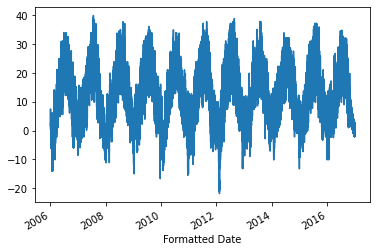

In [55]:
temp = df['Temperature (C)']
temp.plot()

In [56]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [57]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [58]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((96423, 30, 1), (96423,))

In [59]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Formatted Date,,
2006-04-01 00:00:00+02:00,9.472222,1.143842e+09
2006-04-01 01:00:00+02:00,9.355556,1.143846e+09
2006-04-01 02:00:00+02:00,9.377778,1.143850e+09
2006-04-01 03:00:00+02:00,8.288889,1.143853e+09
2006-04-01 04:00:00+02:00,8.755556,1.143857e+09
...,...,...
2016-09-09 19:00:00+02:00,26.016667,1.473440e+09
2016-09-09 20:00:00+02:00,24.583333,1.473444e+09
2016-09-09 21:00:00+02:00,22.038889,1.473448e+09


In [60]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Formatted Date,,,,,,
2006-04-01 00:00:00+02:00,9.472222,1.143842e+09,-5.000000e-01,0.866025,0.999813,0.019334
2006-04-01 01:00:00+02:00,9.355556,1.143846e+09,-2.588190e-01,0.965926,0.999827,0.018617
2006-04-01 02:00:00+02:00,9.377778,1.143850e+09,-4.187642e-12,1.000000,0.999840,0.017901
2006-04-01 03:00:00+02:00,8.288889,1.143853e+09,2.588190e-01,0.965926,0.999852,0.017184
2006-04-01 04:00:00+02:00,8.755556,1.143857e+09,5.000000e-01,0.866025,0.999864,0.016467


In [61]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Formatted Date,,,,,
2006-04-01 00:00:00+02:00,9.472222,-5.000000e-01,0.866025,0.999813,0.019334
2006-04-01 01:00:00+02:00,9.355556,-2.588190e-01,0.965926,0.999827,0.018617
2006-04-01 02:00:00+02:00,9.377778,-4.187642e-12,1.000000,0.999840,0.017901
2006-04-01 03:00:00+02:00,8.288889,2.588190e-01,0.965926,0.999852,0.017184
2006-04-01 04:00:00+02:00,8.755556,5.000000e-01,0.866025,0.999864,0.016467


In [62]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [63]:
WINDOW_SIZE = 30
X2, y2 = df_to_X_y2(temp_df, WINDOW_SIZE)
X2.shape, y2.shape

((96423, 30, 5), (96423,))

In [64]:
X2_train, y2_train = X2[:77138], y2[:77138]
X2_val, y2_val = X2[77138:86780], y2[77138:86780]
X2_test, y2_test = X2[86780:], y2[86780:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((77138, 30, 5), (77138,), (9642, 30, 5), (9642,), (9643, 30, 5), (9643,))

In [65]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [66]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[-9.35488519e-01, -5.00000000e-01,  8.66025404e-01,
         -8.77523033e-01,  4.79534489e-01],
        [-9.40076398e-01, -2.58819045e-01,  9.65925826e-01,
         -8.77179086e-01,  4.80163359e-01],
        [-1.05649382e+00, -5.98281080e-12,  1.00000000e+00,
         -8.76834688e-01,  4.80791982e-01],
        ...,
        [-1.09096843e-01, -5.62803177e-12,  1.00000000e+00,
         -9.99312514e-01,  3.70742380e-02],
        [-1.39491540e-01,  2.58819045e-01,  9.65925826e-01,
         -9.99285683e-01,  3.77905180e-02],
        [-1.41785479e-01,  5.00000000e-01,  8.66025404e-01,
         -9.99258339e-01,  3.85067786e-02]],

       [[-9.40076398e-01, -2.58819045e-01,  9.65925826e-01,
         -8.77179086e-01,  4.80163359e-01],
        [-1.05649382e+00, -5.98281080e-12,  1.00000000e+00,
         -8.76834688e-01,  4.80791982e-01],
        [-1.09835822e+00,  2.58819045e-01,  9.65925826e-01,
         -8.76489839e-01,  4.81420358e-01],
        ...,
        [-1.39491540e-01,  2.5881904

In [67]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((30, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [68]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [69]:
history1 = model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
2409/2411 [============================>.] - ETA: 0s - loss: 40.5307 - root_mean_squared_error: 6.3664

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 50s 20ms/step - loss: 40.5108 - root_mean_squared_error: 6.3648 - val_loss: 5.8100 - val_root_mean_squared_error: 2.4104
Epoch 2/10
2410/2411 [============================>.] - ETA: 0s - loss: 4.2379 - root_mean_squared_error: 2.0586

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 46s 19ms/step - loss: 4.2372 - root_mean_squared_error: 2.0584 - val_loss: 2.2576 - val_root_mean_squared_error: 1.5025
Epoch 3/10
2411/2411 [==============================] - ETA: 0s - loss: 2.3788 - root_mean_squared_error: 1.5423

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 48s 20ms/step - loss: 2.3788 - root_mean_squared_error: 1.5423 - val_loss: 1.5239 - val_root_mean_squared_error: 1.2345
Epoch 4/10
2409/2411 [============================>.] - ETA: 0s - loss: 1.8825 - root_mean_squared_error: 1.3720

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 47s 19ms/step - loss: 1.8830 - root_mean_squared_error: 1.3722 - val_loss: 1.2473 - val_root_mean_squared_error: 1.1168
Epoch 5/10
2410/2411 [============================>.] - ETA: 0s - loss: 1.6930 - root_mean_squared_error: 1.3012

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 46s 19ms/step - loss: 1.6929 - root_mean_squared_error: 1.3011 - val_loss: 1.1380 - val_root_mean_squared_error: 1.0668
Epoch 6/10
2409/2411 [============================>.] - ETA: 0s - loss: 1.6168 - root_mean_squared_error: 1.2715

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 46s 19ms/step - loss: 1.6162 - root_mean_squared_error: 1.2713 - val_loss: 1.0826 - val_root_mean_squared_error: 1.0405
Epoch 7/10
2409/2411 [============================>.] - ETA: 0s - loss: 1.5848 - root_mean_squared_error: 1.2589

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 46s 19ms/step - loss: 1.5859 - root_mean_squared_error: 1.2593 - val_loss: 1.0552 - val_root_mean_squared_error: 1.0272
Epoch 8/10
2409/2411 [============================>.] - ETA: 0s - loss: 1.5555 - root_mean_squared_error: 1.2472

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 46s 19ms/step - loss: 1.5576 - root_mean_squared_error: 1.2480 - val_loss: 1.0267 - val_root_mean_squared_error: 1.0133
Epoch 9/10
2411/2411 [==============================] - 41s 17ms/step - loss: 1.5370 - root_mean_squared_error: 1.2398 - val_loss: 1.0425 - val_root_mean_squared_error: 1.0210
Epoch 10/10
2411/2411 [==============================] - ETA: 0s - loss: 1.5145 - root_mean_squared_error: 1.2306

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


2411/2411 [==============================] - 47s 19ms/step - loss: 1.5145 - root_mean_squared_error: 1.2306 - val_loss: 1.0250 - val_root_mean_squared_error: 1.0124


In [70]:
from tensorflow.keras.models import load_model
model4 = load_model('model4/')

In [71]:
train_predictions1 = model4.predict(X2_train).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y2_train})
train_results1

,Train Predictions,Actuals
0,6.472729,7.261111
1,8.002089,7.800000
2,9.903351,9.872222
3,11.983294,12.222222
4,13.985826,15.094444
...,...,...
77133,-0.244588,0.355556
77134,0.697213,1.138889
77135,1.999309,2.222222
77136,3.323230,2.916667


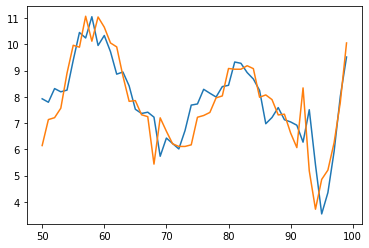

In [72]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [73]:
val_predictions1 = model4.predict(X2_val).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y2_val})
val_results1

,Val Predictions,Actuals
0,3.361933,2.933333
1,2.894672,4.022222
2,3.703186,3.883333
3,3.532602,3.838889
4,3.167121,2.966667
...,...,...
9637,2.337288,11.644444
9638,9.432073,11.577778
9639,11.013396,10.783333
9640,10.415394,10.488889


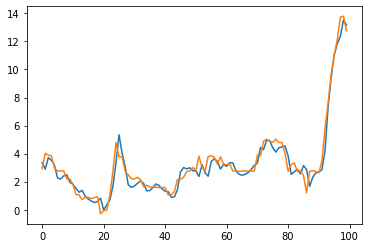

In [74]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [75]:
test_predictions1 = model4.predict(X2_test).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y2_test})
test_results1

,Test Predictions,Actuals
0,9.918106,10.716667
1,10.584908,10.027778
2,10.834184,11.022222
3,12.654541,12.583333
4,14.721367,14.983333
...,...,...
9638,25.505932,26.016667
9639,23.201462,24.583333
9640,22.650234,22.038889
9641,21.389370,21.522222


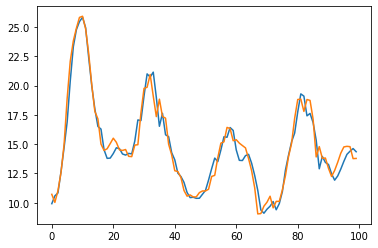

In [76]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

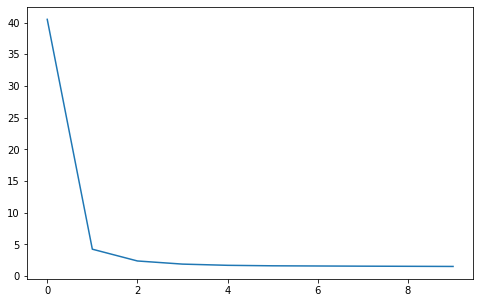

In [77]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

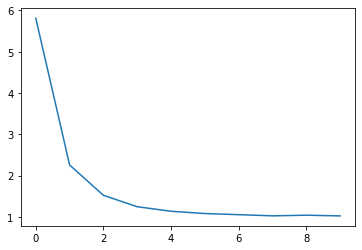

In [78]:
plt.plot(history1.history['val_loss'])

In [79]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions    Actuals
 0        9.918106  10.716667
 1       10.584908  10.027778
 2       10.834184  11.022222
 3       12.654541  12.583333
 4       14.721367  14.983333
 ...           ...        ...
 9638    25.505932  26.016667
 9639    23.201462  24.583333
 9640    22.650234  22.038889
 9641    21.389370  21.522222
 9642    20.668100  20.438889
 
 [9643 rows x 2 columns], 0.9342889724504321)

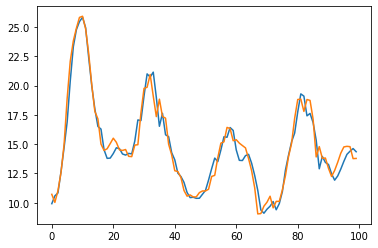

In [80]:
plot_predictions1(model4, X2_test, y2_test)